## PART 02: TELCO CUSTOMER CHURN ANALYSIS

#### Author: GREJELL B. SEGURA
#### Date: August 04, 2020

### NOTE:  
#### This notebook is the continuation of the Churn Analysis. This covers the initial training of models, feature engineering and model selection.

In [1]:
import pandas as pd
import numpy as np
import os

from pycaret.classification import *

In [2]:
os.chdir(r'/home/grejell/Projects/arab-bank-test-churn-analysis')
X_train = pd.read_pickle('./data/X_train.pkl')
Y_train = pd.read_pickle('./data/Y_train.pkl')
x_test = pd.read_pickle('./data/x_test.pkl')
y_test = pd.read_pickle('./data/y_test.pkl')
data = pd.read_pickle('./data/cleanData.pkl')
data.rename({'Churn_Yes':'target'}, axis=1, inplace=True)

# 1. Model Comparison and Base Model Selection

Below are the models ran in pycaret.  
These models are not yet tuned.  
It has been cross validated within 5 folds.  
It is sorted based on the highest AUC.

In [4]:
clf1 = setup(data, target = 'target')

best1 = compare_models(sort='AUC', fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.8092,0.8529,0.5558,0.6705,0.6075,0.4829,0.4869,0.8374
1,Logistic Regression,0.8090,0.8505,0.5558,0.6700,0.6074,0.4827,0.4865,0.0702
2,Ada Boost Classifier,0.8011,0.8502,0.5412,0.6525,0.5912,0.4613,0.4652,0.3048
3,CatBoost Classifier,0.8058,0.8466,0.5528,0.6613,0.6020,0.4749,0.4784,5.5110
4,Linear Discriminant Analysis,0.8011,0.8428,0.5657,0.6434,0.6019,0.4701,0.4719,0.0292
5,Light Gradient Boosting Machine,0.7958,0.8387,0.5451,0.6355,0.5865,0.4520,0.4546,0.1457
6,Extreme Gradient Boosting,0.7881,0.8293,0.5260,0.6203,0.5689,0.4297,0.4325,0.8291
7,Naive Bayes,0.7013,0.8250,0.8547,0.4667,0.6036,0.3958,0.4426,0.0063
8,Random Forest Classifier,0.7836,0.8059,0.4587,0.6273,0.5298,0.3936,0.4018,0.1146
9,Extra Trees Classifier,0.7737,0.7967,0.4824,0.5913,0.5311,0.3840,0.3876,0.2802


The top models include GBM, Logistic Regression, Adaboost, Catboost and LDA.

The data is imbalanced with around 73.4% for YES while NO is 26.6%.  
For this reason, it is recommendable to balance the data.  
This will improve the performance of the models.  
Pycaret utilizes the oversampling method called SMOTE to balance the data during training.

In [5]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
best2 = compare_models(sort='AUC', fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ada Boost Classifier,0.7714,0.8480,0.7423,0.5521,0.6328,0.4721,0.4835,0.3671
1,Gradient Boosting Classifier,0.7842,0.8478,0.6903,0.5787,0.6294,0.4789,0.4828,1.2863
2,Logistic Regression,0.7956,0.8461,0.6452,0.6088,0.6264,0.4859,0.4864,0.1085
3,CatBoost Classifier,0.7940,0.8419,0.6131,0.6123,0.6125,0.4722,0.4724,7.2989
4,Linear Discriminant Analysis,0.7956,0.8398,0.6529,0.6075,0.6293,0.4885,0.4892,0.0352
5,Light Gradient Boosting Machine,0.7942,0.8354,0.6193,0.6118,0.6151,0.4747,0.4750,0.2296
6,Extreme Gradient Boosting,0.7814,0.8232,0.5864,0.5892,0.5877,0.4390,0.4391,1.3736
7,Naive Bayes,0.7085,0.8182,0.8303,0.4723,0.6021,0.3983,0.4380,0.0069
8,Random Forest Classifier,0.7747,0.8112,0.5360,0.5832,0.5584,0.4076,0.4083,0.1106
9,Extra Trees Classifier,0.7747,0.7956,0.5206,0.5863,0.5513,0.4016,0.4030,0.3739


After balancing the data, the top models now are now, Adaboost, GBM, Logistic Regression, Catboost, and LDA.  
We will now tune the models 1 by 1.  
We will include LGBM and XGBoost as top models for the reason that these algorithms are known to perform better when tuned.  
There are 7 models to tune, after that we will select the best among these models.

# 2. Hyperparameter Tuning

Pycaret employs random grid search from scikitlearn to select the best parameters.  
The number of iterations determine the total number of combination it will randomly select.  
The combination with the highest AUC will be selected as the best parameters.  
In addition, this iterations will be done with a cross validation in 5 folds.  
The algorithm also alots 30% of data as hold out intended for testing.

# 2.1 Adaboost

In [7]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
ada = create_model('ada')
tuned_ada = tune_model(ada, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7685,0.8623,0.8015,0.5440,0.6481,0.4849,0.5052
1,0.7685,0.8424,0.7710,0.5459,0.6392,0.4761,0.4914
2,0.7591,0.8475,0.7969,0.5306,0.6371,0.4675,0.4891
3,0.7185,0.8389,0.8084,0.4817,0.6037,0.4064,0.4392
4,0.7419,0.8457,0.7977,0.5098,0.6220,0.4401,0.4656
Mean,0.7513,0.8474,0.7951,0.5224,0.6300,0.4550,0.4781
SD,0.0191,0.0080,0.0127,0.0241,0.0156,0.0286,0.0232


After tuning, the AUC was not improved. But recall, accuracy and precision were improved.

In [8]:
plot_model(tuned_ada, plot = 'parameter')

,Parameters
algorithm,SAMME
base_estimator,None
learning_rate,0.34
n_estimators,140
random_state,542


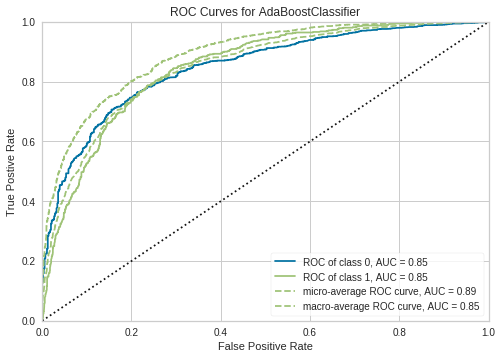

In [9]:
plot_model(tuned_ada, plot='auc')

In [10]:
predict_model(tuned_ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8009,0.848,0.5241,0.6577,0.5833,0.4548,0.4598


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1,target,Label,Score
0,1.327365,-1.504071,-0.469710,0,1,1,0,1,0,0,...,1,0,1,0,0,1.0,0.0,0,0,0.3120
1,0.268022,-1.322910,-0.564257,0,1,1,0,0,1,0,...,0,0,0,0,1,1.0,0.0,0,0,0.3159
2,-0.506113,0.864311,-0.146607,1,0,0,1,1,0,0,...,0,0,0,1,0,0.0,1.0,1,0,0.4978
3,1.612573,0.917496,1.986579,1,0,0,1,1,0,0,...,1,0,0,1,0,1.0,0.0,0,0,0.3287
4,-1.239504,0.182882,-0.948950,0,1,1,0,1,0,0,...,0,0,0,1,0,1.0,0.0,0,0,0.4937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,1.368109,1.695322,2.496613,0,1,0,1,1,0,0,...,0,1,0,0,0,1.0,0.0,0,0,0.3907
2106,-1.239504,-1.477478,-0.987378,1,0,1,0,1,0,0,...,0,0,0,0,1,1.0,0.0,0,0,0.4285
2107,0.756950,0.543541,0.813064,0,1,1,0,1,0,0,...,1,0,1,0,0,1.0,0.0,0,0,0.3616
2108,-0.995040,-0.456997,-0.824249,0,1,0,1,0,1,0,...,1,0,0,1,0,1.0,0.0,1,0,0.4817


# 2.2 Gradient Boosting Classifier

In [12]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7787,0.8350,0.7176,0.5663,0.6330,0.4777,0.4846
1,0.7716,0.8648,0.7557,0.5515,0.6377,0.4768,0.4894
2,0.7632,0.8283,0.7011,0.5414,0.6110,0.4448,0.4525
3,0.7693,0.8376,0.7280,0.5491,0.6260,0.4639,0.4736
4,0.7846,0.8482,0.7519,0.5727,0.6502,0.4986,0.5082
Mean,0.7735,0.8428,0.7309,0.5562,0.6316,0.4724,0.4817
SD,0.0074,0.0127,0.0206,0.0115,0.0129,0.0177,0.0184


In [13]:
plot_model(tuned_gbc, plot = 'parameter')

,Parameters
ccp_alpha,0
criterion,friedman_mse
init,None
learning_rate,0.01
loss,deviance
max_depth,90
max_features,sqrt
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None


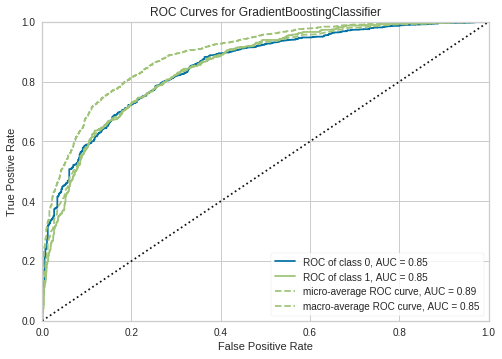

In [14]:
plot_model(tuned_gbc, plot='auc')

In [ ]:
predict_model(tuned_gbc)

# 2.3 Logistic Regression

In [15]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
lr = create_model('lr')
tuned_lr = tune_model(lr, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8091,0.8609,0.6679,0.6341,0.6506,0.5194,0.5197
1,0.7980,0.8358,0.6069,0.6235,0.6151,0.4782,0.4782
2,0.7785,0.8365,0.6322,0.5749,0.6022,0.4491,0.4501
3,0.8089,0.8589,0.6360,0.6409,0.6385,0.5086,0.5086
4,0.7805,0.8291,0.6069,0.5846,0.5955,0.4450,0.4451
Mean,0.7950,0.8442,0.6300,0.6116,0.6204,0.4801,0.4804
SD,0.0133,0.0131,0.0226,0.0268,0.0210,0.0302,0.0300


In [16]:
plot_model(tuned_lr, plot = 'parameter')

,Parameters
C,3.38
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,-1
penalty,l2


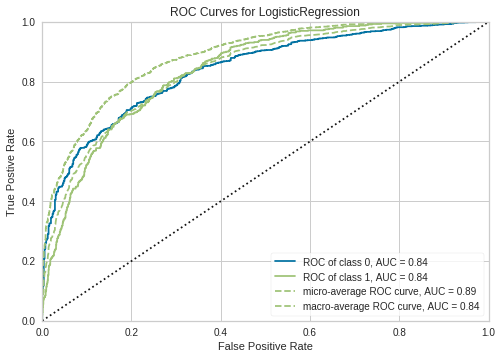

In [17]:
plot_model(tuned_lr, plot='auc')

In [ ]:
predict_model(tuned_lr)

# 2.4 Catboost

In [ ]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
cb = create_model('catboost')
tuned_cb = tune_model(cb, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7809,0.8370,0.5496,0.5950,0.5714,0.4246,0.4252
1,0.7911,0.8479,0.6107,0.6061,0.6084,0.4659,0.4659
2,0.7907,0.8376,0.5923,0.6063,0.5992,0.4576,0.4576
3,0.8069,0.8285,0.6462,0.6316,0.6388,0.5070,0.5071
4,0.7785,0.8134,0.5954,0.5821,0.5887,0.4371,0.4372
5,0.7785,0.8325,0.5954,0.5821,0.5887,0.4371,0.4372
6,0.8130,0.8953,0.6870,0.6383,0.6618,0.5328,0.5335
7,0.7907,0.8512,0.6260,0.6029,0.6142,0.4706,0.4708
8,0.7581,0.8014,0.5878,0.5423,0.5641,0.3971,0.3977
9,0.7927,0.8578,0.5878,0.6160,0.6016,0.4616,0.4618


IntProgress(value=0, description='Processing: ', max=11)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:48:42
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


In [ ]:
plot_model(tuned_cb, plot = 'parameter')

In [ ]:
plot_model(tuned_cb, plot='auc')

In [ ]:
predict_model(tuned_cb)

# 2.5 Linear Discriminant Analysis

In [ ]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
lda = create_model('lda')
tuned_lda = tune_model(lda, optimize = 'AUC', n_iter = 1000, fold=5)

In [ ]:
plot_model(tuned_lda, plot = 'parameter')

In [ ]:
plot_model(tuned_lda, plot='auc')

In [ ]:
predict_model(tuned_lda)

# 2.6 Light GBM

In [18]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
lgb = create_model('lightgbm')
tuned_lgb = tune_model(lgb, optimize = 'AUC', n_iter = 1000, fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7787,0.8364,0.7099,0.5671,0.6305,0.4753,0.4815
1,0.7959,0.8544,0.7252,0.5956,0.6540,0.5113,0.5163
2,0.7754,0.8487,0.7088,0.5606,0.6261,0.4687,0.4753
3,0.7652,0.8223,0.6092,0.5521,0.5792,0.4170,0.4180
4,0.7744,0.8429,0.6985,0.5613,0.6224,0.4643,0.4699
Mean,0.7779,0.8409,0.6903,0.5673,0.6225,0.4673,0.4722
SD,0.0100,0.0111,0.0414,0.0149,0.0243,0.0301,0.0316


In [19]:
plot_model(tuned_lgb, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1
importance_type,split
learning_rate,0.1
max_depth,90
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.3
n_estimators,50


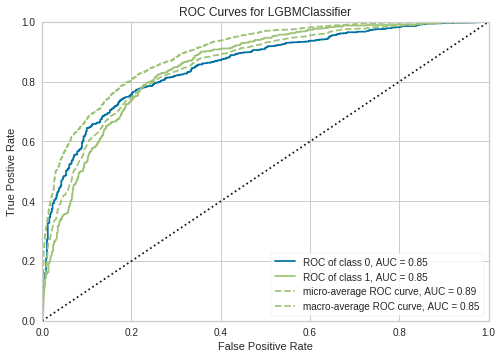

In [20]:
plot_model(tuned_lgb, plot='auc')

In [ ]:
predict_model(tuned_lgb)

In [ ]:
clf2 = setup(data, target = 'target', fix_imbalance = True) # this will implement the oversampling using the SMOTE method to balance the data
xgb = create_model('xgboost')
tuned_xgb = tune_model(xgb, optimize = 'AUC', n_iter = 50, fold = 5)

In [ ]:
plot_model(tuned_xgb, plot = 'parameter')

In [ ]:
plot_model(tuned_xgb, plot='auc')

In [ ]:
predict_model(tuned_xgb)